<a href="https://colab.research.google.com/github/Usama-Saifullah/Project/blob/main/DL_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [5]:
# prompt: uploade dataset

from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [6]:
import zipfile
import os

# Define the zip file name
zip_file_name = 'archive.zip'  # Make sure to include the correct name with spaces

# Create a directory to extract the files
extract_path = 'extracted_dataset'
os.makedirs(extract_path, exist_ok=True)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List the extracted files to verify
extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)

Extracted files: ['FER13_cleaner']


In [7]:
# Set paths for train and test data
train_data_dir = '/content/extracted_dataset/FER13_cleaner/test'
test_data_dir = '/content/extracted_dataset/FER13_cleaner/train'

# Create ImageDataGenerators for train and test sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images in batches from the directories
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(48, 48),
    color_mode='grayscale',  # as images are grayscale
    batch_size=64,
    class_mode='categorical'  # we are doing multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    batch_size=64,
    class_mode='categorical'
)


Found 7121 images belonging to 7 classes.
Found 24597 images belonging to 7 classes.


In [8]:
model = Sequential()

# Add convolutional layers with BatchNormalization and Dropout
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten and dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer (7 classes)
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,423,111 (5.43 MB)

 Trainable params: 1,421,703 (5.42 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [9]:
# Callbacks to improve training
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    callbacks=callbacks
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


112/112 ━━━━━━━━━━━━━━━━━━━━ 32s 200ms/step - accuracy: 0.1753 - loss: 2.8082 - val_accuracy: 0.2778 - val_loss: 2.0277 - learning_rate: 0.0010
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 14s 124ms/step - accuracy: 0.2146 - loss: 2.2262 - val_accuracy: 0.2778 - val_loss: 1.8822 - learning_rate: 0.0010
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 14s 124ms/step - accuracy: 0.2223 - loss: 2.0546 - val_accuracy: 0.2778 - val_loss: 1.8812 - learning_rate: 0.0010
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 17s 154ms/step - accuracy: 0.2347 - loss: 1.9346 - val_accuracy: 0.2792 - val_loss: 1.7896 - learning_rate: 0.0010
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 15s 128ms/step - accuracy: 0.2475 - loss: 1.8782 - val_accuracy: 0.2888 - val_loss: 1.7883 - learning_rate: 0.0010
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 23s 153ms/step - accuracy: 0.2617 - loss: 1.8178 - val_accuracy: 0.2906 - val_loss: 1.7236 - learning_rate: 0.0010
Epoch 7/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 128ms/step - accuracy: 0.2664 - loss:

385/385 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.4804 - loss: 1.4042
Test Loss: 1.4054
Test Accuracy: 0.4768
385/385 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.12      0.09      0.10      2832
           1       0.00      0.00      0.00       380
           2       0.10      0.08      0.09      2535
           3       0.28      0.30      0.29      6834
           4       0.18      0.21      0.19      4295
           5       0.19      0.25      0.21      4685
           6       0.12      0.08      0.09      3036

    accuracy                           0.20     24597
   macro avg       0.14      0.14      0.14     24597
weighted avg       0.18      0.20      0.19     24597



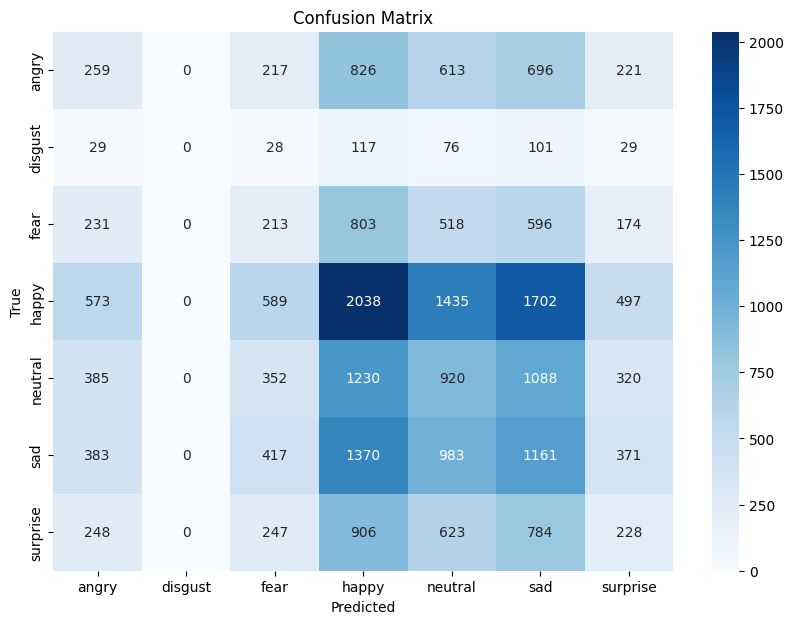

In [10]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict and generate classification report
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = test_generator.classes

# Classification report
print(classification_report(y_true_classes, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


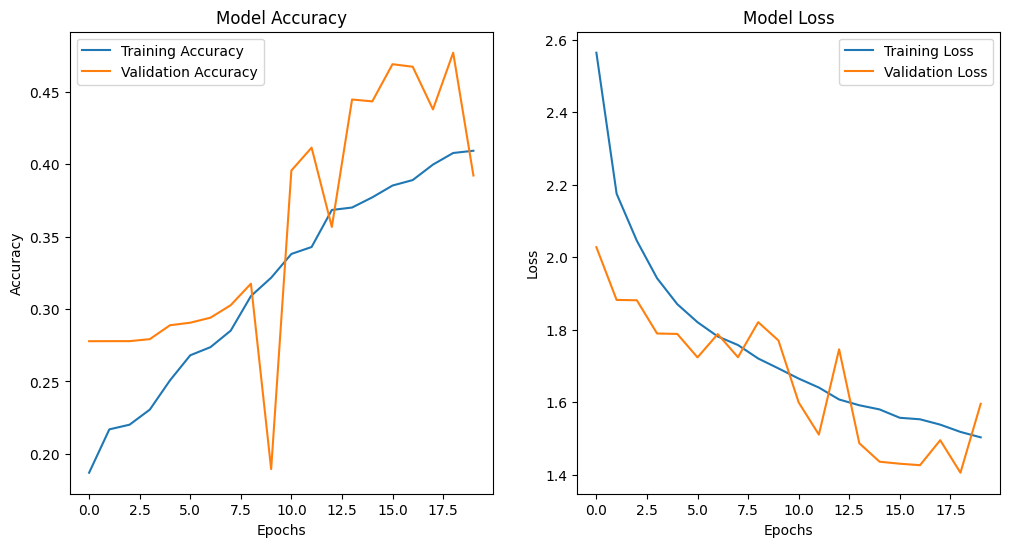

In [11]:
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [13]:
import os
print(os.listdir('.'))

['.config', '.ipynb_checkpoints', 'archive.zip', 'extracted_dataset0', 'extracted_dataset', 'sample_data']


In [15]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_emotion(image_path):
    image = load_img(image_path, color_mode='grayscale', target_size=(48, 48))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    emotion_label = np.argmax(prediction)
    emotion_classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    print(f"Predicted Emotion: {emotion_classes[emotion_label]}")

# Example usage
predict_emotion('/content/R.png')


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step
Predicted Emotion: Angry
